<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/erd_%EC%98%88%EC%81%98%EA%B2%8C_%EC%88%98%EC%A0%95_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import os
import warnings
import matplotlib as mpl


In [ ]:
!cd /content/drive/MyDrive/"Colab Notebooks"/python_test_with_colab/"data anaylsis"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/python_test_with_colab/data anaylsis/train2.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
df.columns = ['NaN', 'id','Gender','Lenght','Diameter',
             'Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight','Target']

In [ ]:
# 결측치 분석 결측치 없음으로 확인.
df.isnull().sum()

NaN               0
id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of        NaN    id Gender  Lenght  Diameter  Height  Whole Weight  \
0     1154  1155      M   0.570     0.480   0.180        0.9395   
1      830   831      M   0.560     0.425   0.135        0.9415   
2     1162  1163      F   0.655     0.510   0.150        1.0430   
3      599   600      I   0.310     0.225   0.050        0.1445   
4     1058  1059      M   0.310     0.225   0.075        0.1295   
...    ...   ...    ...     ...       ...     ...           ...   
1122   912   913      F   0.565     0.450   0.185        0.9285   
1123    26    27      F   0.575     0.450   0.160        1.0680   
1124    16    17      I   0.580     0.435   0.150        0.8915   
1125   456   457      F   0.590     0.455   0.150        0.9760   
1126   897   898      I   0.725     0.550   0.220        2.0495   

      Shucked Weight  Viscra Weight  Shell Weight  Target  
0             0.3990         0.2000        0.2950      14  
1             0.5090         0.2015        

In [ ]:
df.shape

(1127, 11)

In [ ]:
df.dtypes

NaN                 int64
id                  int64
Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [ ]:
df.describe()

,NaN,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,625.349601,626.349601,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,363.756770,363.756770,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.000000,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,312.500000,313.500000,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,623.000000,624.000000,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,939.500000,940.500000,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,1252.000000,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.count()

NaN               1127
id                1127
Gender            1127
Lenght            1127
Diameter          1127
Height            1127
Whole Weight      1127
Shucked Weight    1127
Viscra Weight     1127
Shell Weight      1127
Target            1127
dtype: int64

In [ ]:
df.corr()

,NaN,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
NaN,1.000000,1.000000,0.005647,0.008098,0.027576,0.020325,0.011309,0.026939,0.024770,0.064267
id,1.000000,1.000000,0.005647,0.008098,0.027576,0.020325,0.011309,0.026939,0.024770,0.064267
Lenght,0.005647,0.005647,1.000000,0.987336,0.905323,0.926032,0.895539,0.902617,0.897628,0.544288
Diameter,0.008098,0.008098,0.987336,1.000000,0.912596,0.928018,0.891400,0.901182,0.907122,0.569380
Height,0.027576,0.027576,0.905323,0.912596,1.000000,0.897565,0.840838,0.868035,0.902457,0.606440
Whole Weight,0.020325,0.020325,0.926032,0.928018,0.897565,1.000000,0.967998,0.966080,0.952435,0.536748
Shucked Weight,0.011309,0.011309,0.895539,0.891400,0.840838,0.967998,1.000000,0.931633,0.872618,0.418847
Viscra Weight,0.026939,0.026939,0.902617,0.901182,0.868035,0.966080,0.931633,1.000000,0.903189,0.494249
Shell Weight,0.024770,0.024770,0.897628,0.907122,0.902457,0.952435,0.872618,0.903189,1.000000,0.624020
Target,0.064267,0.064267,0.544288,0.569380,0.606440,0.536748,0.418847,0.494249,0.624020,1.000000


In [ ]:
df_co = df[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight','Target']].corr()
df_coo = df_co.drop(['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight'],axis=1)
df_cooo = df_coo.drop(index='Target')
df_cooo

,Target
Lenght,0.544288
Diameter,0.569380
Height,0.606440
Whole Weight,0.536748
Shucked Weight,0.418847
Viscra Weight,0.494249
Shell Weight,0.624020


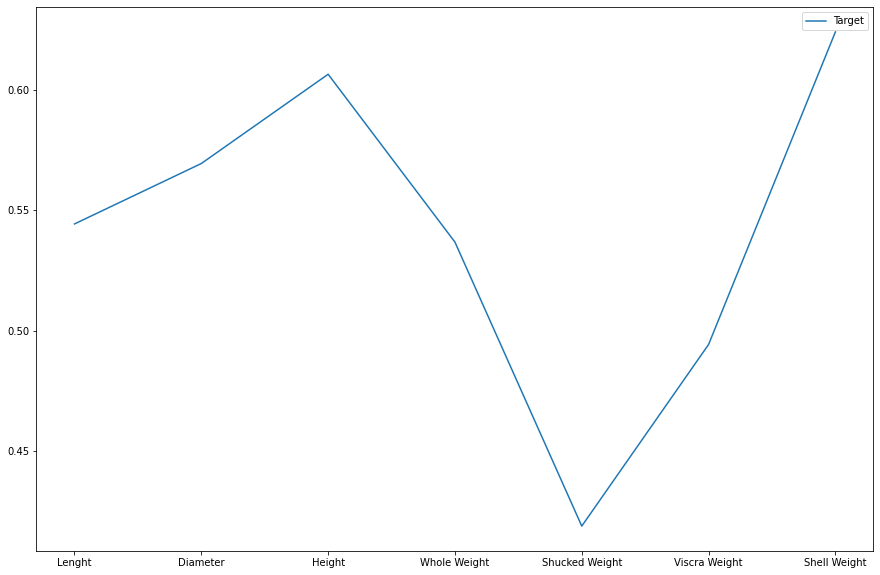

In [ ]:
df_cooo.plot(figsize = (15,10))

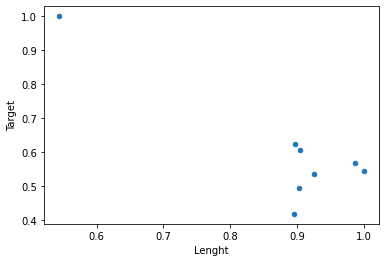

In [ ]:
df_co.plot(x='Lenght',y='Target',kind='scatter')

In [ ]:
df_co

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987336,0.905323,0.926032,0.895539,0.902617,0.897628,0.544288
Diameter,0.987336,1.000000,0.912596,0.928018,0.891400,0.901182,0.907122,0.569380
Height,0.905323,0.912596,1.000000,0.897565,0.840838,0.868035,0.902457,0.606440
Whole Weight,0.926032,0.928018,0.897565,1.000000,0.967998,0.966080,0.952435,0.536748
Shucked Weight,0.895539,0.891400,0.840838,0.967998,1.000000,0.931633,0.872618,0.418847
Viscra Weight,0.902617,0.901182,0.868035,0.966080,0.931633,1.000000,0.903189,0.494249
Shell Weight,0.897628,0.907122,0.902457,0.952435,0.872618,0.903189,1.000000,0.624020
Target,0.544288,0.569380,0.606440,0.536748,0.418847,0.494249,0.624020,1.000000


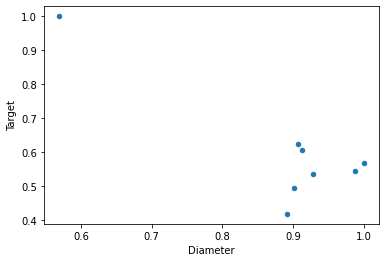

In [ ]:
df_co.plot(x='Diameter',y='Target',kind='scatter')

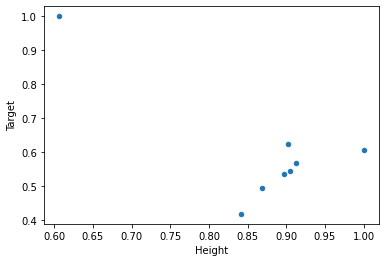

In [ ]:
df_co.plot(x='Height',y='Target',kind='scatter')

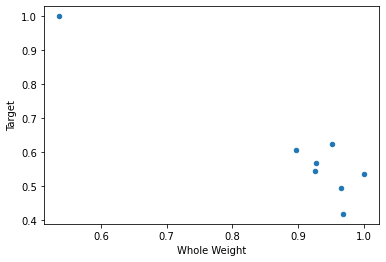

In [ ]:
df_co.plot(x='Whole Weight',y='Target',kind='scatter')

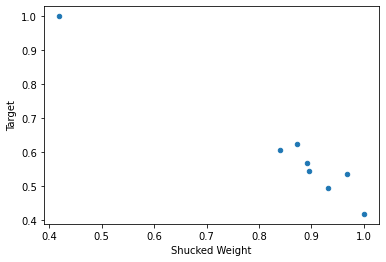

In [ ]:
df_co.plot(x='Shucked Weight',y='Target',kind='scatter')

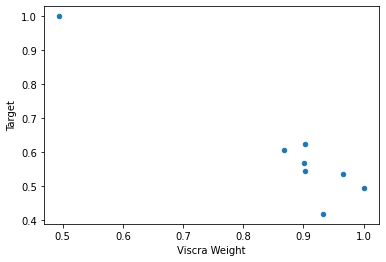

In [ ]:
df_co.plot(x='Viscra Weight',y='Target',kind='scatter')

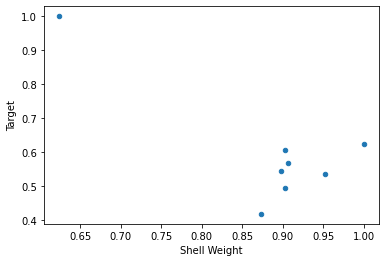

In [ ]:
df_co.plot(x='Shell Weight',y='Target',kind='scatter')

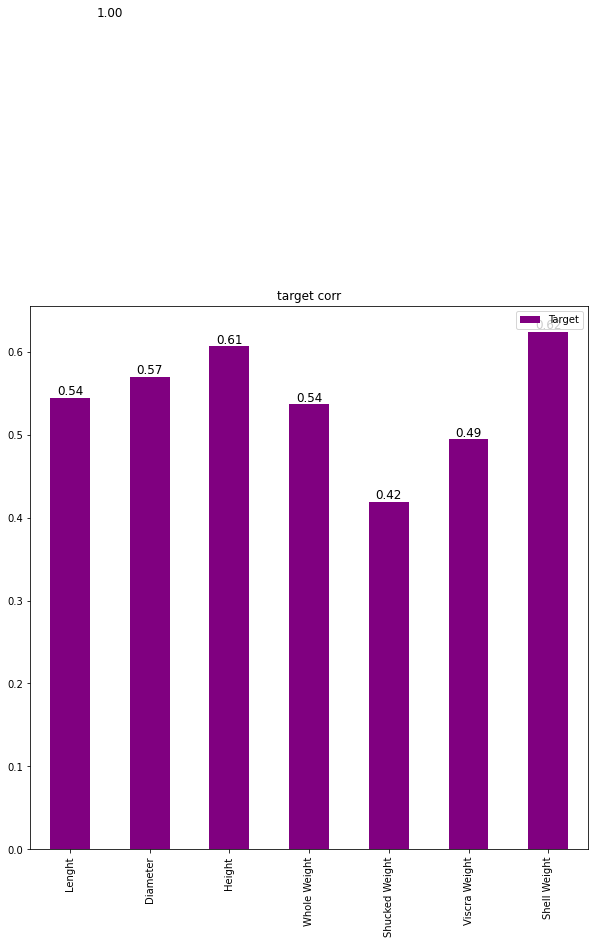

In [ ]:
bar = df_cooo.plot.bar(figsize=(10,10), title = 'target corr', color = ['purple'])
bars = [rect for rect in bar.get_children() if isinstance(rect, mpl.patches.Rectangle)]
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()


In [ ]:
df.drop(columns=['id'], axis=1, inplace=True)

In [ ]:
df.describe()

,NaN,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,625.349601,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,363.756770,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,312.500000,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,623.000000,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,939.500000,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,1252.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
plot_cols_list = df.columns[1:]
df[plot_cols_list]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9
...,...,...,...,...,...,...,...,...,...
1122,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12
1123,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6
1125,F,0.590,0.455,0.150,0.9760,0.4650,0.2055,0.2765,10


In [ ]:
plot_cols_list = df.columns[1:]
print(plot_cols_list)

#df[plot_cols_list].hist(figsize = (10,10))
x = df[Lenght]
print(x)
sns.distplot(x)
plt.show()

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


NameError: ignored

In [ ]:
def corr_heat(df):
    plt.figure(figsize=(15,15))

    corr_df = df.corr()

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr value', fontsize=30)
    plt.show()
    
corr_heat(df[plot_cols_list])

In [ ]:
f,ax = plt.subplots(figsize=(15,15))
sns.histplot(x='Target',data=df,hue='Gender',kde=True)

In [ ]:
f,ax = plt.subplots(figsize=(15,15))
sns.histplot(x='Target',data=df,hue='Gender',kde=True)

In [ ]:
df_cooo.columns

In [ ]:
sns.kdeplot(x=df_co['Target'])

In [ ]:
def corr_heat(df):
    plt.figure(figsize=(15,15))

    corr_df = df.corr()

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr value', fontsize=30)
    plt.show()
    
corr_heat(df[plot_cols_list])

In [ ]:
numerical_features = [x for x in df.keys() if x not in ['Gender','Target']]

In [ ]:
fig, axes = plt.subplots(3,3 , figsize=(13,13))
fig.suptitle("data")
for i in range(7):
    row, col = i//3, i%3
    feature = numerical_features[i]
    x = df[feature]
    ax = axes[row][col]
    sns.histplot(x, kde=True, ax=ax, color='#FC7F77')
    
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = df)
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = df, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1